In [1]:
from ib_insync import IB, util
from ib_insync.contract import Future, ContFuture, Forex
from ib_insync.client import Client
import datetime

In [2]:
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 4002, clientId=24)

<IB connected to 127.0.0.1:4002 clientId=24>

In [3]:
contract = ContFuture('NQ', exchange='GLOBEX')

In [4]:
util.df(ib.reqContractDetails(contract))

,contract,marketName,minTick,orderTypes,validExchanges,priceMagnifier,underConId,longName,contractMonth,industry,...,callable,putable,coupon,convertible,maturity,issueDate,nextOptionDate,nextOptionType,nextOptionPartial,notes
0,"Contract(secType='CONTFUT', conId=357283192, s...",NQ,0.25,"ACTIVETIM,AD,ADJUST,ALERT,ALGO,ALLOC,AVGCOST,B...","GLOBEX,QBALGO",1,11004958,E-mini NASDAQ 100 Futures,202006,,...,False,False,0,False,,,,,False,


In [5]:
date = datetime.datetime.strptime('20180103', '%Y%m%d')
date

datetime.datetime(2018, 1, 3, 0, 0)

In [7]:
bars = ib.reqHistoricalData(contract,
                            endDateTime='',
                            durationStr='10 D',
                            barSizeSetting='30 secs',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )

In [8]:
df = util.df(bars)
df.set_index('date', inplace=True)
df

,open,high,low,close,volume,average,barCount
date,,,,,,,
2020-05-01 00:00:00,8847.00,8851.50,8830.00,8839.25,510,8840.825,355
2020-05-01 00:00:30,8838.75,8846.75,8836.75,8836.75,191,8841.600,142
2020-05-01 00:01:00,8837.25,8837.75,8823.25,8828.50,285,8831.900,218
2020-05-01 00:01:30,8830.00,8836.75,8827.25,8829.75,134,8831.525,116
2020-05-01 00:02:00,8828.00,8832.25,8827.50,8830.75,109,8830.100,93
...,...,...,...,...,...,...,...
2020-05-14 18:25:30,8938.75,8940.25,8934.25,8935.00,396,8936.375,285
2020-05-14 18:26:00,8934.50,8940.25,8933.00,8934.50,483,8936.075,364
2020-05-14 18:26:30,8934.00,8938.25,8931.50,8935.00,255,8934.325,208


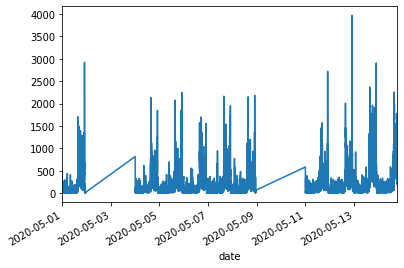

In [10]:
df.volume.plot();

In [12]:
avg_periods = 30

In [13]:
roll =  df.volume.rolling(avg_periods).sum().mean().round()
roll

4852.0

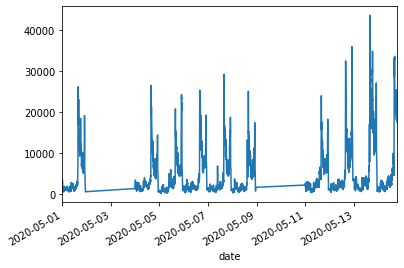

In [15]:
df.volume.rolling(avg_periods).sum().plot();

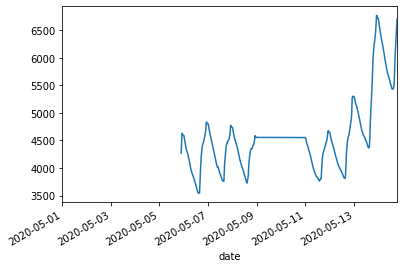

Peer closed connection


In [21]:
 df.volume.rolling(avg_periods).sum() \
            .ewm(span=10000, min_periods=8000).mean().round().plot();

In [26]:
df.loc['20180102 20:00:00':].head(50)

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-01-02 20:00:00,2690.50,2690.75,2690.25,2690.25,573,2690.500,80
2018-01-02 20:01:00,2690.25,2691.25,2690.25,2691.25,1184,2690.875,124
2018-01-02 20:02:00,2691.25,2691.25,2690.75,2691.00,1544,2691.100,144
2018-01-02 20:03:00,2690.75,2691.25,2690.75,2691.25,440,2691.200,94
2018-01-02 20:04:00,2691.25,2691.50,2691.00,2691.25,927,2691.150,127
2018-01-02 20:05:00,2691.25,2691.50,2691.00,2691.00,1179,2691.175,112
2018-01-02 20:06:00,2691.00,2691.25,2690.75,2691.00,252,2691.000,47
2018-01-02 20:07:00,2691.00,2691.00,2690.75,2690.75,114,2690.975,37
2018-01-02 20:08:00,2690.75,2691.00,2690.75,2690.75,633,2690.775,60


In [12]:
dt = ''
barsList = []
while True:
    bars = ib.reqHistoricalData(contract,
                            endDateTime=dt,
                            durationStr='10 D',
                            barSizeSetting='1 min',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )
    if not bars:
        break
    barsList.append(bars)
    dt = bars[0].date - datetime.timedelta(minutes=1)
    print(dt)

allBars = [b for bars in reversed(barsList) for b in bars]
df = util.df(allBars)

2019-08-25 23:59:00
2019-08-15 23:59:00
2019-08-05 23:59:00
2019-07-28 23:59:00
2019-07-18 23:59:00
2019-07-08 23:59:00
2019-06-30 23:59:00
2019-06-20 23:59:00
2019-06-10 23:59:00
2019-06-02 23:59:00
2019-05-23 23:59:00
2019-05-13 23:59:00
2019-05-05 23:59:00
2019-04-25 23:59:00
2019-04-15 23:59:00
2019-04-07 23:59:00
2019-03-28 22:59:00
2019-03-18 22:59:00
2019-03-08 22:58:00
2019-02-26 22:57:00
2019-02-17 23:59:00
2019-02-07 23:59:00
2019-01-28 23:59:00
2019-01-20 23:59:00
2019-01-10 23:59:00
2019-01-01 23:59:00
2018-12-23 23:59:00
2018-12-13 23:59:00
2018-12-03 23:59:00
2018-11-25 23:59:00
2018-11-15 23:59:00
2018-11-05 23:59:00
2018-10-28 22:59:00
2018-10-18 23:59:00
2018-10-08 23:59:00
2018-09-30 23:59:00
2018-09-20 23:59:00
2018-09-10 23:59:00
2018-09-02 23:59:00
2018-08-23 23:59:00
2018-08-13 23:59:00
2018-08-05 23:59:00
2018-07-26 23:59:00
2018-07-16 23:59:00
2018-07-08 23:59:00
2018-06-28 23:59:00
2018-06-18 23:59:00
2018-06-10 23:59:00
2018-05-31 23:59:00
2018-05-21 23:59:00


Error 1100, reqId -1: Connectivity between IB and Trader Workstation has been lost.
Error 1102, reqId -1: Connectivity between IB and Trader Workstation has been restored - data maintained.


2017-11-19 23:59:00
2017-11-09 23:59:00
2017-10-30 23:58:00
2017-10-22 23:59:00
2017-10-12 23:59:00
2017-10-02 23:59:00
2017-09-24 23:59:00
2017-09-14 23:59:00
2017-09-04 23:59:00
2017-08-27 23:59:00
2017-08-17 23:59:00
2017-08-07 23:59:00
2017-07-30 23:59:00
2017-07-20 23:59:00
2017-07-10 23:59:00
2017-07-02 23:59:00
2017-06-23 00:08:00
2017-06-13 00:07:00
2017-06-04 23:59:00
2017-05-25 23:59:00
2017-05-15 23:59:00
2017-05-08 00:06:00
2017-04-28 01:56:00
2017-04-18 01:55:00
2017-04-09 23:59:00
2017-03-31 01:35:00
2017-03-21 02:08:00
2017-03-12 23:01:00
2017-03-03 06:43:00
2017-02-21 06:42:00
2017-02-13 00:08:00
2017-02-03 09:50:00
2017-01-24 09:49:00
2017-01-16 13:42:00
2017-01-06 13:41:00
2016-12-27 13:40:00
2016-12-19 08:57:00
2016-12-09 08:56:00
2016-11-29 08:55:00
2016-11-20 23:59:00
2016-11-11 14:55:00
2016-11-01 14:54:00
2016-10-24 14:22:00
2016-10-14 18:07:00
2016-10-04 18:06:00
2016-09-26 14:39:00
2016-09-19 16:14:00
2016-09-09 16:13:00
2016-08-30 17:03:00


Error 162, reqId 169: Historical Market Data Service error message:HMDS query returned no data: CLV9@NYMEX Trades, contract: ContFuture(symbol='CL', exchange='NYMEX')


In [13]:
df.date = df.date.astype('datetime64')
df.set_index('date', inplace=True)
df.tail()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2019-09-06 17:02:00,55.48,55.53,55.47,55.52,859,55.502,262
2019-09-06 17:03:00,55.52,55.54,55.49,55.50,420,55.522,155
2019-09-06 17:04:00,55.50,55.55,55.49,55.54,709,55.528,302
2019-09-06 17:05:00,55.55,55.60,55.53,55.59,1493,55.575,546
2019-09-06 17:06:00,55.59,55.64,55.56,55.62,1119,55.608,396


In [14]:
df.to_pickle('minute_CL_cont_non_active_included.pickle')

Peer closed connection


In [ ]:
df.info()

In [ ]:
df.tail()